In [9]:
import networkx as nx
import pandas as pd
import numpy as np
import re
import seaborn as sns
import collections
import community
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from collections import Counter
from nltk.corpus import wordnet as wn

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
edges_raw = pd.read_csv("edges.csv")

# Convert columns into list of tuples
tup_edges = list(zip(edges_raw["Source"], edges_raw["Target"]))

# # list of nodes and associated connections
edges = [t for t in (set(tuple(i) for i in tup_edges))]

In [4]:
# create networkx graph
Gx = nx.Graph()
Gx.add_edges_from(edges)

In [5]:
len(Gx.nodes)

75253

In [12]:
degrees = pd.DataFrame([[tup[0], tup[1]]for tup in nx.degree(Gx)])

degrees.rename(mapper={0:"Node ID",1:"Degrees"},inplace=True,axis=1)
degrees.sort_values("Degrees",inplace=True)
degrees.reset_index(inplace=True,drop=True)
degrees.head()

,Node ID,Degrees
0,fish stick,1
1,anthrax,1
2,splenic fever,1
3,cu in,1
4,cuttable,1


In [13]:
degrees["Degrees"].mean()

3.086415159528524

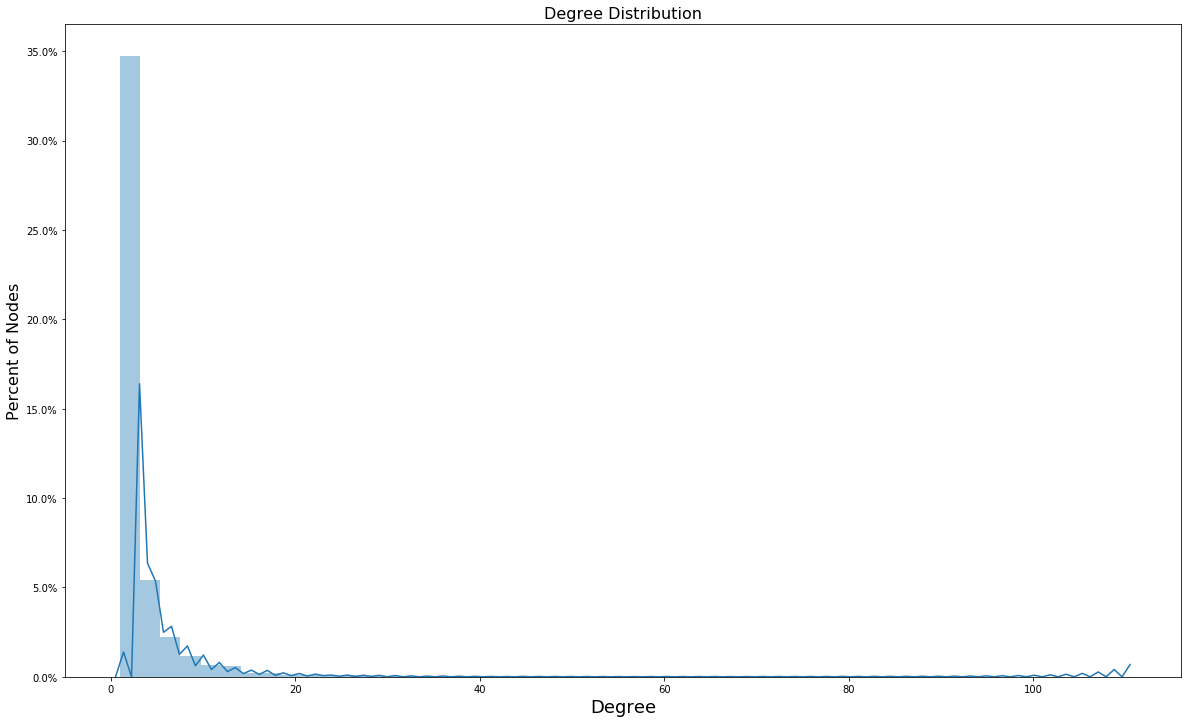

In [11]:
fig, ax = plt.subplots(figsize=(20,12)) #<-- Create the subplots

dist = sns.distplot(degrees["Degrees"])
dist.set(xlabel='Degrees', ylabel='Percentage of Nodes')

plt.xlabel('Degree', fontsize=18)
plt.ylabel('Percent of Nodes', fontsize=16)
plt.title("Degree Distribution", fontsize=16)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
fig.savefig('Degree_dist.png')

In [27]:
degrees["Degrees"].median()

2.0

In [24]:
np.percentile(degrees["Degrees"],75)

3.0

In [4]:
eig = nx.eigenvector_centrality(Gx)
degree = nx.degree_centrality(Gx)
between = nx.betweenness_centrality(Gx)

eig_df = pd.DataFrame.from_dict(eig, orient="index", columns = ["Eig Centrality"])
degree_df = pd.DataFrame.from_dict(degree, orient="index", columns = ["Degree Centrality"])
# takes so long to run so just going to comment this out. CSV file of it already exists
between_df = pd.DataFrame.from_dict(between, orient="index", columns = ["Between Centrality"])

In [1]:
# between_df.to_csv("betweeness.csv")

In [ ]:
degree_df.sort_values("Degree",ascending=False).head(5)

In [15]:
ego_graph = nx.ego_graph(Gx, "pass", radius=3)

In [18]:
len(ego_graph.nodes)

4371

In [22]:
ego_graph.degree

DegreeView({'take over': 9, 'established': 10, 'distortion': 3, 'tripping': 10, 'lay out': 8, 'temperate': 1, 'laced': 3, 'parry': 5, 'twisty': 3, 'great': 13, 'manage': 16, 'testimonial': 2, 'pluck': 23, 'put aside': 1, 'engineer': 5, 'healthy': 7, 'imbibing': 9, 'rambling': 11, 'gamble': 8, 'riotous': 11, 'agnize': 3, 'not guilty': 1, 'diddle': 5, 'table service': 1, 'brooding': 3, 'omit': 14, 'trade': 7, 'end': 11, 'twine': 9, 'insouciant': 2, 'move over': 5, 'bounteous': 8, 'displume': 7, 'read/write head': 1, 'dissipated': 22, 'flag': 6, 'hinderance': 7, 'get going': 9, 'softened': 5, 'wandering': 17, 'colonised': 2, 'counterpunch': 2, 'foreman': 4, 'attractor': 5, 'gap': 8, 'readable': 2, 'trump': 4, 'flop': 5, 'tint': 4, 'expiration': 8, 'suck out': 1, 'house': 2, 'tortuous': 5, 'concurring': 2, 'shadowy': 5, 'pissed': 25, 'take a chance': 8, 'lapse': 20, 'condition': 7, 'gambling': 1, 'draw out': 11, 'hotshot': 14, 'straight': 3, 'concord': 10, 'undone': 6, 'circus tent': 3, 'g

In [23]:
ego_degrees = pd.DataFrame([[tup[0], tup[1]]for tup in nx.degree(ego_graph)])

ego_degrees.rename(mapper={0:"Node ID",1:"Degrees"},inplace=True,axis=1)

In [24]:
ego_degrees

,Node ID,Degrees
0,take over,9
1,established,10
2,distortion,3
3,tripping,10
4,lay out,8
...,...,...
4366,shiny,7
4367,spiel,2
4368,tweet,7
4369,go steady,5


In [ ]:
layout = nx.spring_layout(ego_graph)
fig, ax = plt.subplots(figsize=(20,12)) #<-- Create the subplots
    
nx.draw_networkx_nodes(ego_graph,layout,node_size=10, alpha=0.5,with_labels=False)
nx.draw_networkx_edges(ego_graph,layout, alpha=0.5)
nx.draw_networkx_nodes(ego_graph, layout, nodelist=["pass"], node_color='r',node_size = 100)
ax.axis('off')
fig.savefig('pass.png')

In [37]:
len(ego_graph.nodes)

899

In [4]:
depth1 = nx.ego_graph(Gx, "pass", radius=1)

In [5]:
partition = community.best_partition(depth1,resolution=3)

In [6]:
partition

{'croak': 0,
 'egest': 2,
 'guided': 2,
 'fell': 2,
 'draw': 2,
 'slip away': 2,
 'fall': 2,
 'fade': 1,
 'passing': 2,
 'return': 2,
 'go past': 2,
 'pass along': 2,
 'evanesce': 1,
 'expired': 0,
 'clear': 2,
 'top': 2,
 'go along': 2,
 'guide': 2,
 'excreting': 2,
 'take place': 1,
 'go across': 2,
 'eliminate': 2,
 'go through': 2,
 'choked': 0,
 'toss': 2,
 'perish': 0,
 'pass by': 2,
 'give-up the ghost': 0,
 'elapsed': 2,
 'returning': 2,
 'base on balls': 2,
 'legislating': 2,
 'overtaking': 2,
 'pass off': 1,
 'choke': 0,
 'blow over': 1,
 'strait': 2,
 'spent': 2,
 'pass': 2,
 'sunken': 2,
 'gone': 0,
 'pass away': 0,
 'liberty chit': 2,
 'fling': 2,
 'hap': 1,
 'head': 2,
 'drop dead': 0,
 'sink': 2,
 'hand': 2,
 'travel by': 2,
 'reach': 2,
 'flip': 2,
 'exit': 0,
 'handed': 2,
 'drew': 2,
 'authorised': 2,
 'sunk': 2,
 'led': 2,
 'spending': 2,
 'fall out': 1,
 "cash in one's chips": 0,
 'laissez passer': 2,
 'bye': 2,
 'slip by': 2,
 'turn over': 2,
 'passing game': 2,
 '

In [7]:
communities = pd.DataFrame(Counter(partition.values()),index=[0])
trans = communities.T
trans.rename(mapper={0:"Count"},axis=1,inplace=True)

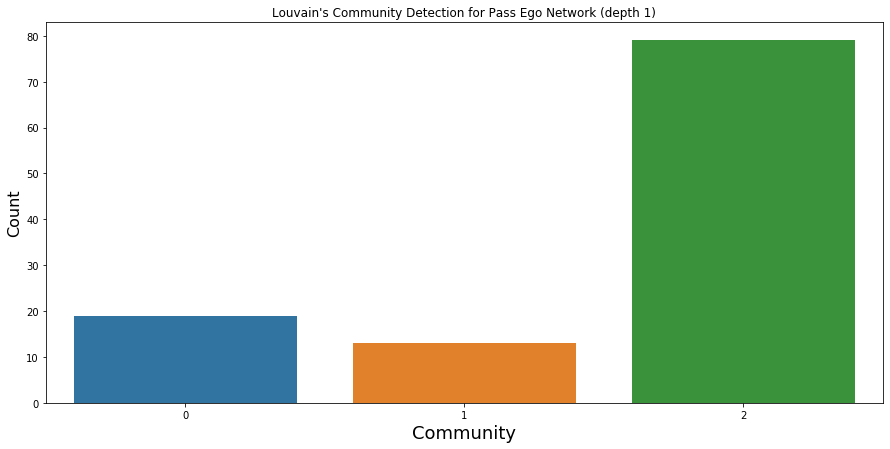

In [16]:
fig, ax = plt.subplots(figsize=(15,7)) #<-- Create the subplots

sns.barplot(x=trans.sort_values(by=["Count"],ascending=False).head(10).index,y=trans.sort_values(by=["Count"],ascending=False).head(10)["Count"])
ax.set_xlabel('Community')

plt.title("Louvain's Community Detection for Pass Ego Network (depth 1)")
plt.xlabel('Community', fontsize=18)
plt.ylabel('Count', fontsize=16)
fig.savefig('community_dist.png')

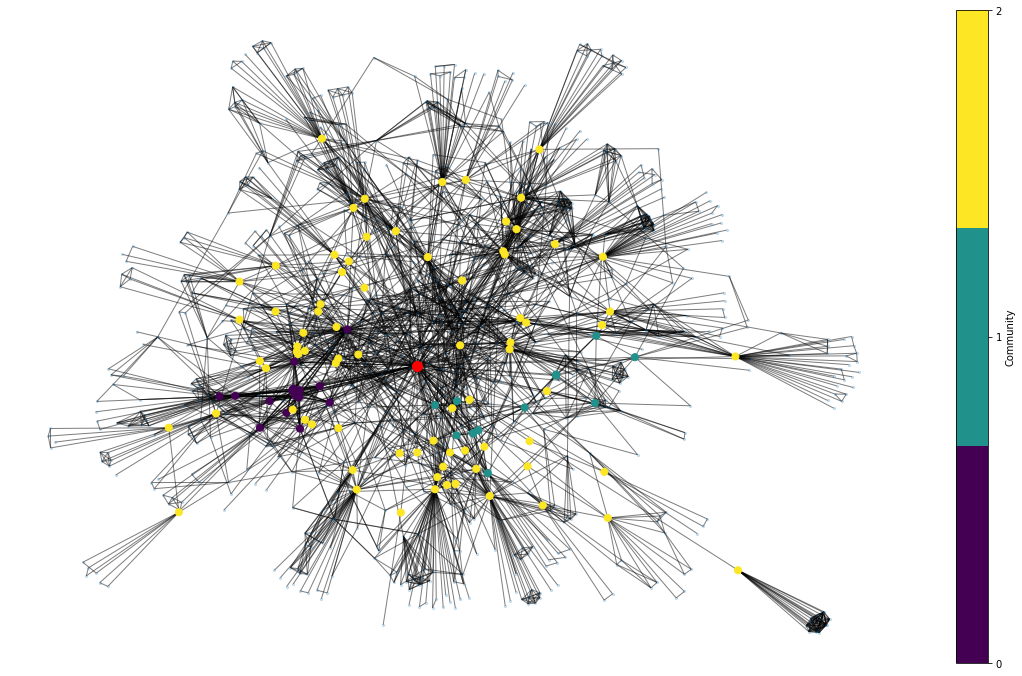

In [17]:
n_clusters = len(np.unique([partition[key] for key in partition]))

vmin = min([partition[key] for key in partition])
vmax = max([partition[key] for key in partition])

cmap = plt.get_cmap('viridis', n_clusters)


fig, ax = plt.subplots(figsize=(20,12)) #<-- Create the subplots
ax.axis("off")
nx.draw_networkx_nodes(ego_graph,layout,node_size=5, alpha=0.2,with_labels=False)
nx.draw_networkx_edges(ego_graph,layout, alpha=0.5)


nx.draw_networkx_nodes(ego_graph, layout, nodelist = [key for key in partition.keys()], node_size=50,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_nodes(ego_graph, layout, nodelist=["pass"], node_color='r',node_size = 100)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,ticks=np.unique([partition[key] for key in partition]))

cbar.set_ticklabels(np.arange(len([partition[key] for key in partition])))
cbar.set_label('Community', rotation=90)
fig.savefig('community_network.png')

In [9]:
partition

{'croak': 0,
 'egest': 2,
 'guided': 2,
 'fell': 2,
 'draw': 2,
 'slip away': 2,
 'fall': 2,
 'fade': 1,
 'passing': 2,
 'return': 2,
 'go past': 2,
 'pass along': 2,
 'evanesce': 1,
 'expired': 0,
 'clear': 2,
 'top': 2,
 'go along': 2,
 'guide': 2,
 'excreting': 2,
 'take place': 1,
 'go across': 2,
 'eliminate': 2,
 'go through': 2,
 'choked': 0,
 'toss': 2,
 'perish': 0,
 'pass by': 2,
 'give-up the ghost': 0,
 'elapsed': 2,
 'returning': 2,
 'base on balls': 2,
 'legislating': 2,
 'overtaking': 2,
 'pass off': 1,
 'choke': 0,
 'blow over': 1,
 'strait': 2,
 'spent': 2,
 'pass': 2,
 'sunken': 2,
 'gone': 0,
 'pass away': 0,
 'liberty chit': 2,
 'fling': 2,
 'hap': 1,
 'head': 2,
 'drop dead': 0,
 'sink': 2,
 'hand': 2,
 'travel by': 2,
 'reach': 2,
 'flip': 2,
 'exit': 0,
 'handed': 2,
 'drew': 2,
 'authorised': 2,
 'sunk': 2,
 'led': 2,
 'spending': 2,
 'fall out': 1,
 "cash in one's chips": 0,
 'laissez passer': 2,
 'bye': 2,
 'slip by': 2,
 'turn over': 2,
 'passing game': 2,
 '